In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import math 


In [6]:
pip install h5py

     |████████████████████████████████| 3.0 MB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [105]:
file=h5py.File('ideal_phi.h5','r')
solution=file['phi'][:,:,:,:,:]

In [107]:
file['phi']

<HDF5 dataset "phi": shape (101, 16, 16, 16, 10), type "<f8">

In [108]:
time=100
last=solution[time,8,8,:,3]
first=solution[1,8,8,:,3]
fixposition=solution[:,8,8,8,3]
norm= np.sqrt((solution[:,:,:,:,0]**2+solution[:,:,:,:,1]**2+solution[:,:,:,:,2]**2+solution[:,:,:,:,3]**2))
phase= solution[:,:,:,:,3]/norm
phase2=solution[:,:,:,:,3]/solution[:,:,:,:,0]
phasecenter=phase[:,8,8,8]
phasetime1= phase[1,8,8,:]
phasetime100= phase[time,8,8,:]
def charge(time,charge):
    return solution[time,8,8,:,charge]
def fun(time):
    return phase[time,8,8,:]
def fun2(time):
    return phase2[time,8,8,:]

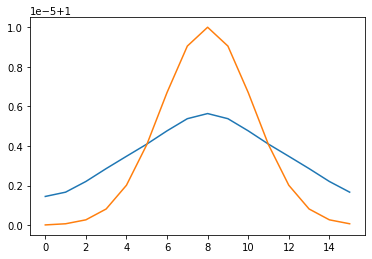

In [109]:
plt.plot(last)
plt.plot(first)

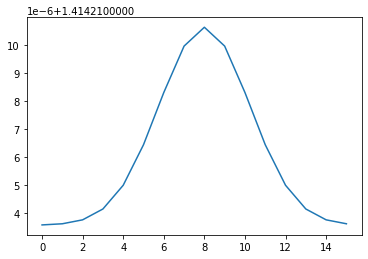

In [110]:
plt.plot(norm[8,8,8])

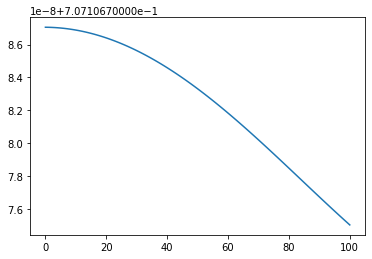

In [99]:
plt.plot(phasecenter)


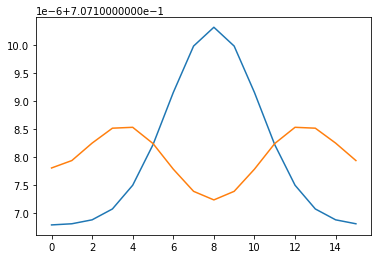

In [111]:
plt.plot(phasetime1)
plt.plot(phasetime100)

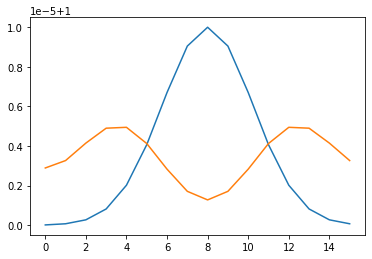

In [117]:
plt.plot(fun2(1))
plt.plot(fun2(100))

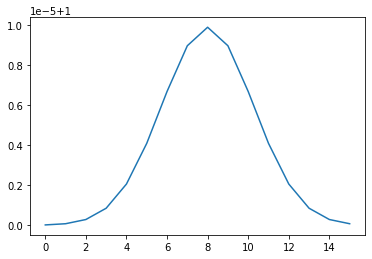

In [115]:
plt.plot(charge(10,3))


# Energy conservation

In [62]:
en = np.loadtxt("idealenergy.txt")

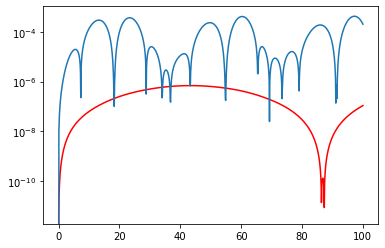

In [63]:
%matplotlib inline
plt.plot(en[:,0],np.abs((en[:,4]-en[0,4])/en[1,4]),'r')
plt.plot(en2[:,0], np.abs((en2[:,4]-en2[0,4])/en2[1,4]))
plt.yscale('log')

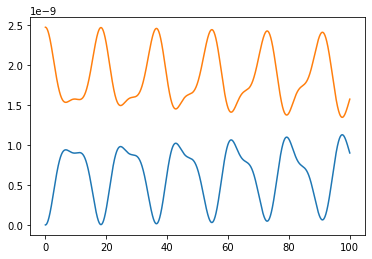

In [24]:
plt.plot(en[:,0],en[:,1])
plt.plot(en[:,0],en[:,2])
